In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

temp_rain_soil = pd.read_csv("../../AucklandCouncilOpenData_08June24/temp_rain_soil_Auckland_2015-10-21to2024-06-08.csv", index_col='Timestamp (UTC+12:00)', parse_dates=True)
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950


In [3]:
temp_rain_soil.tail()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2023-08-23 00:00:00,11.0,0.0,50.77650,11.90
2023-08-23 01:00:00,11.0,0.0,50.82350,11.90
2023-08-23 02:00:00,11.0,0.0,50.82475,11.90
2023-08-23 03:00:00,11.0,0.0,50.85500,11.65
2023-08-23 04:00:00,10.0,0.0,50.95325,11.60


In [4]:
# Check stationarity using ADF test
result = adfuller(temp_rain_soil['Rain(mm)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -31.43020267697512
p-value: 0.0
Critical Values:
	1%: -3.4304956140767477
	5%: -2.8616043582706956
	10%: -2.5668042558069497


- Since the ADF statistic is much lower than the critical values and the p-value is zero, wheich we can confidently reject the null hypothesis that the time series for 'Rain(mm)' has a unit root. 
- This means that the 'Rain(mm)' time series is stationary.
-  the results of the ADF test indicate that the 'Rain(mm)' time series is stationary, meaning its statistical properties are constant over time.

In [5]:
# Determine differencing term
d = 1 if result[1] > 0.05 else 0

# Determine AR and MA terms using ACF and PACF
lags = 50
variables = ['Temp', 'Rain(mm)', 'SoilMoist', 'SoilTemp']


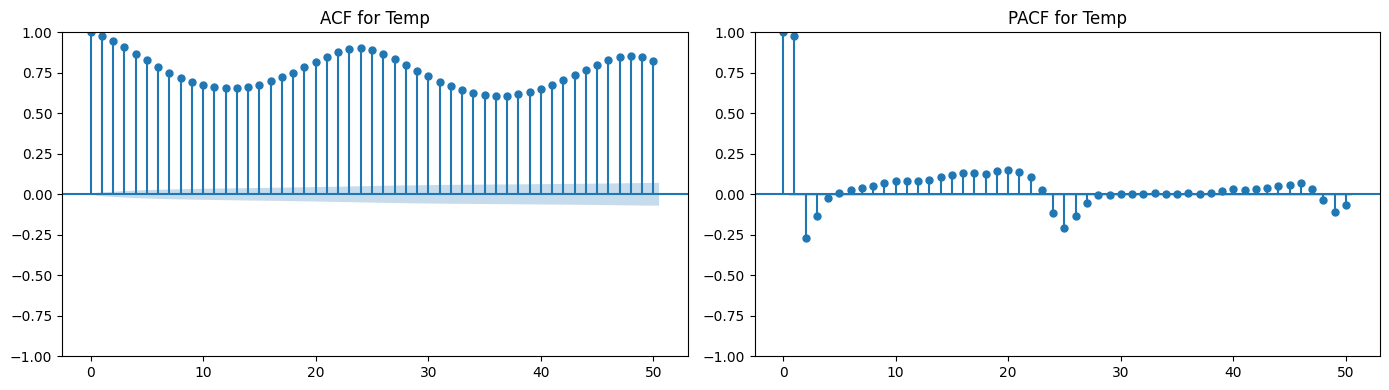

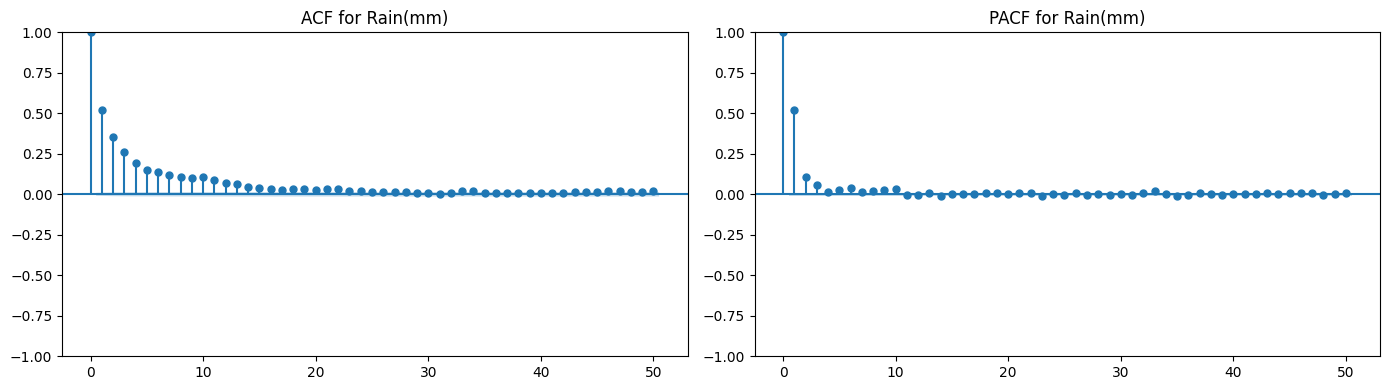

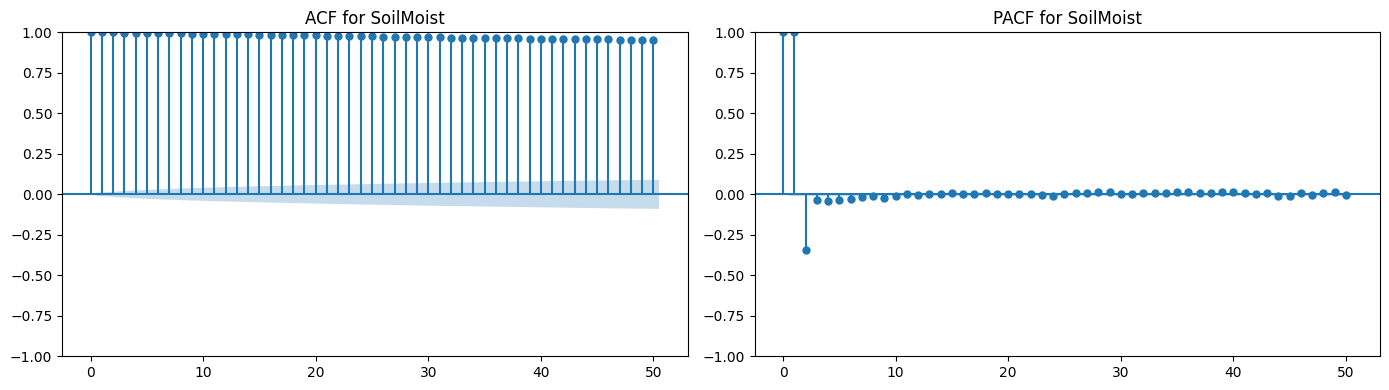

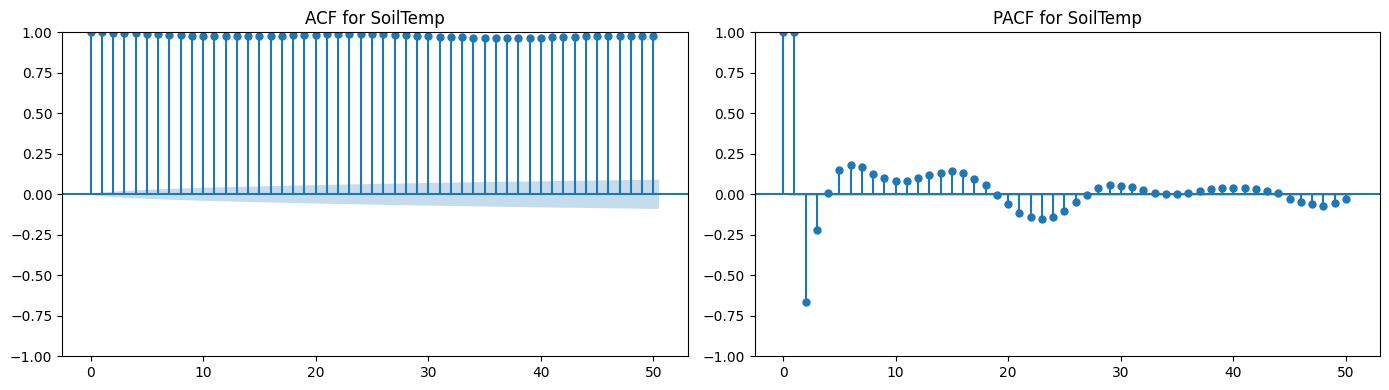

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for var in variables:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(temp_rain_soil[var], lags=lags, ax=ax1, title=f'ACF for {var}')
    plot_pacf(temp_rain_soil[var], lags=lags, ax=ax2, title=f'PACF for {var}')
    plt.tight_layout()
    plt.show()

In [7]:
# Check stationarity using ADF test
result = adfuller(temp_rain_soil['SoilMoist'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.996109333110284
p-value: 0.00143102150789453
Critical Values:
	1%: -3.430495652996742
	5%: -2.861604375472069
	10%: -2.566804264962753


 - ADF Statistic vs. Critical Values: The ADF statistic (-3.996109333110284) is less than all the provided critical values (1%, 5%, and 10%). This means that the test statistic is significantly low enough to reject the null hypothesis at all these confidence levels.
 - p-value: The p-value (0.00143102150789453) is very low (typically, if the p-value is less than 0.05, we reject the null hypothesis). This low p-value further confirms that we can reject the null hypothesis.

 - the results of the ADF test indicate that the SoilMoist time series is stationary, meaning its statistical properties are constant over time
 - the SoilMoist time series is stationary.

In [8]:
# Check stationarity using ADF test
result = adfuller(temp_rain_soil['SoilMoist'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.996109333110284
p-value: 0.00143102150789453
Critical Values:
	1%: -3.430495652996742
	5%: -2.861604375472069
	10%: -2.566804264962753


In [9]:
from sklearn.model_selection import train_test_split
train_data_soil_moist, test_data_soil_moist = train_test_split(temp_rain_soil['SoilMoist'], test_size=0.2, shuffle=False)

# Fit the ARIMA model
p, q = 1, 1  # From ACF and PACF plots
model_soil_moist = ARIMA(train_data_soil_moist, order=(p, d, q))
model_fit_soil_moist = model_soil_moist.fit()
print(model_fit_soil_moist.summary())


f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              SoilMoist   No. Observations:                35956
Model:                 ARIMA(1, 0, 1)   Log Likelihood               30721.134
Date:                Sun, 23 Jun 2024   AIC                         -61434.268
Time:                        10:11:28   BIC                         -61400.308
Sample:                    07-07-2018   HQIC                        -61423.465
                         - 08-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4818      1.883     22.033      0.000      37.792      45.172
ar.L1          0.9994      0.000   4405.543      0.000       0.999       1.000
ma.L1          0.3601      0.001    381.963      0.0

In [10]:
forecast = model_fit_soil_moist.forecast(steps=len(test_data_soil_moist))
mse = mean_squared_error(test_data_soil_moist, forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 35.861152941985246


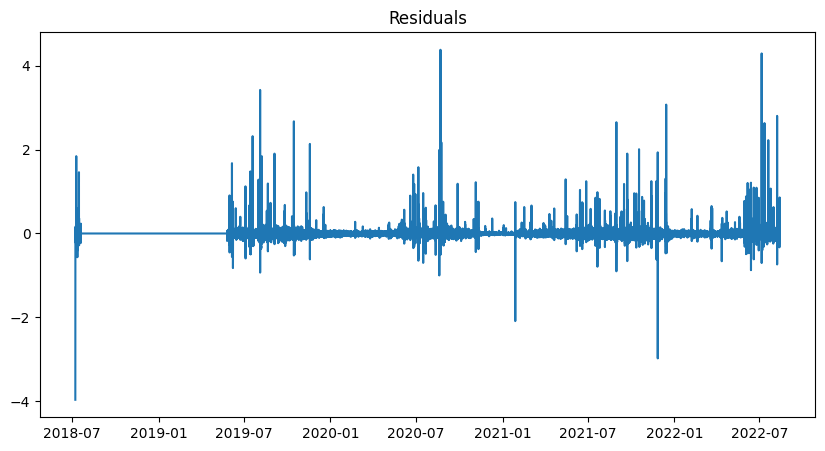

In [11]:
residuals = model_fit_soil_moist.resid
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

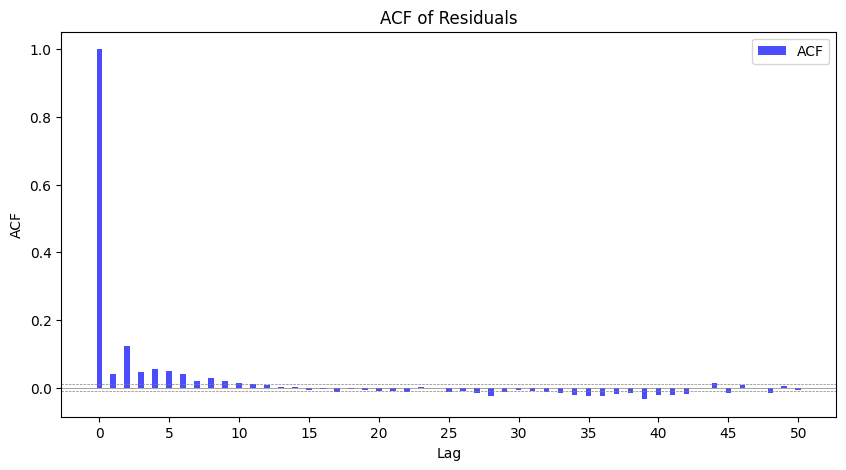

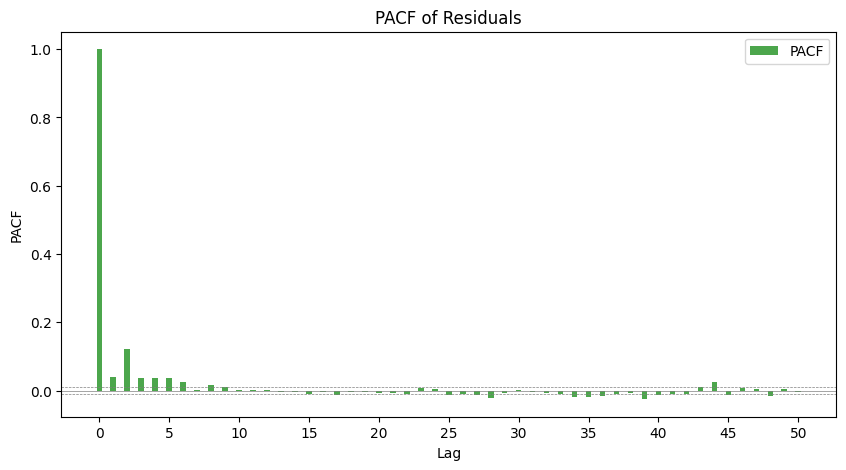

In [12]:
from statsmodels.tsa.stattools import acf, pacf

nlags = 50

acf_resid, acf_confint = acf(residuals, nlags=nlags, fft=True, alpha=0.05)
pacf_resid, pacf_confint = pacf(residuals, nlags=nlags, alpha=0.05)

# Plot ACF of residuals
plt.figure(figsize=(10, 5))
plt.bar(range(len(acf_resid)), acf_resid, width=0.4, color='b', alpha=0.7, label='ACF')
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.axhline(y=-1.96/np.sqrt(len(residuals)), color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=1.96/np.sqrt(len(residuals)), color='gray', linestyle='--', linewidth=0.5)
plt.xticks(range(0, len(acf_resid), 5))
plt.legend(loc='upper right')
plt.show()

# Plot PACF of residuals
plt.figure(figsize=(10, 5))
plt.bar(range(len(pacf_resid)), pacf_resid, width=0.4, color='g', alpha=0.7, label='PACF')
plt.title('PACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.axhline(y=-1.96/np.sqrt(len(residuals)), color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=1.96/np.sqrt(len(residuals)), color='gray', linestyle='--', linewidth=0.5)
plt.xticks(range(0, len(pacf_resid), 5))
plt.legend(loc='upper right')
plt.show()